In [1]:

!pip install --upgrade pip
!pip install palmerpenguins==0.1.4 numpy pandas seaborn==0.12.1 matplotlib==3.5.3 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.0.2 pyjanitor==0.23.1 session-info

  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


**Importando librerías**

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

**Estableciendo apariencia de los gráficos**

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (10, 6)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

**Cargando datos**

In [4]:
raw_penguin_df = palmerpenguins.load_penguins_raw()
raw_penguin_df.head(2)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN


In [5]:
preprocess_penguin_df = palmerpenguins.load_penguins()
preprocess_penguin_df.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007


**Tipos de datos de las variables**

In [6]:
preprocess_penguin_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

**Variables por cada tipo dato**

In [7]:
(
    preprocess_penguin_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

**Cantidad de variables y observaciones**

In [8]:
preprocess_penguin_df.shape

(344, 8)

**¿Existen valores nulos?**

In [9]:
(
    preprocess_penguin_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

**¿Cuántos valores nulos tengo por cada variable?**

In [10]:
(
    preprocess_penguin_df
    .isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

**Proporción de valores nulos por cada variable**

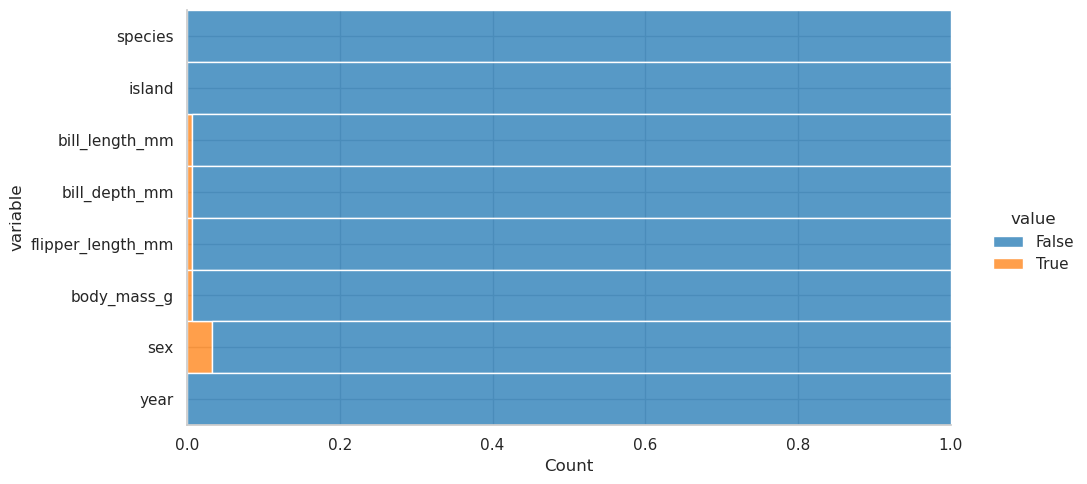

In [11]:
(
    preprocess_penguin_df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
            data = df,
            y = 'variable',
            hue = 'value',
            multiple = 'fill',
            aspect=2)
        )
    )
)

**¿Cómo puedo visualizar los valores nulos en todo el conjunto de datos?**

<AxesSubplot:>

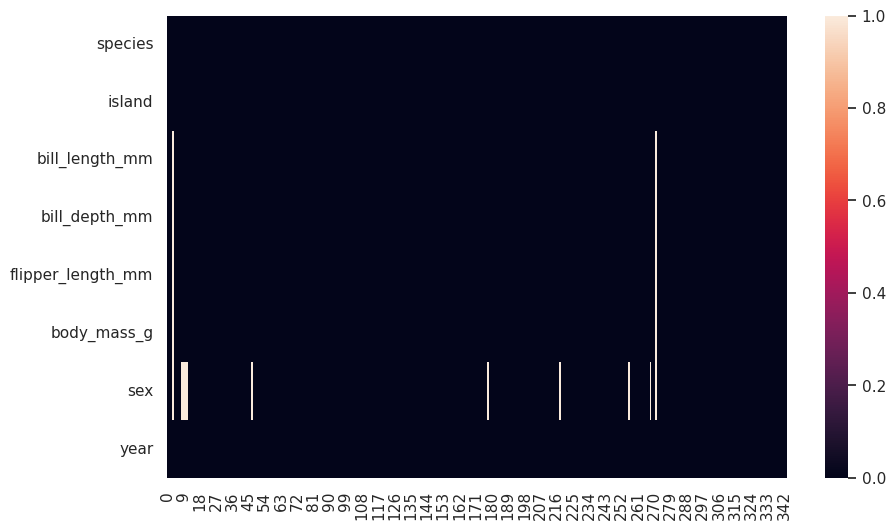

In [12]:
(
    preprocess_penguin_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
            data = df
            )
        )
    )
)

Teniendo en cuenta que observamos que la mayoría de datos faltantes provienen de un solo pingûino, 
podemos contemplar la opción de eliminar dichas observaciones del análisis, pero primero es importante
identificar cuántas observaciones perdemos si optamos por este camino.

**¿Cuántas observaciones perdemos si eliminamos los datos faltantes?**

In [13]:
process_penguin_df = (
    preprocess_penguin_df
    .dropna()
)

process_penguin_df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


**Conteos y proporciones**

¿Qué estadísticos describen el conjunto de datos?

  
  **Todas las variables**

In [14]:
process_penguin_df.describe(include = 'all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


**Análisis variables numéricas**

In [15]:
process_penguin_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


**Análisis variables categóricas**

In [16]:
process_penguin_df.describe(include = 'object')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


*Convirtiendo mis variables categóricas a tipo categoría*

In [17]:
(
    process_penguin_df
    .astype({
        'species':'category',
        'island':'category',
        'sex':'category'
    }
    )
    .dtypes
)

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                    int64
dtype: object

**Visualizando los conteos con pandas**

<AxesSubplot:>

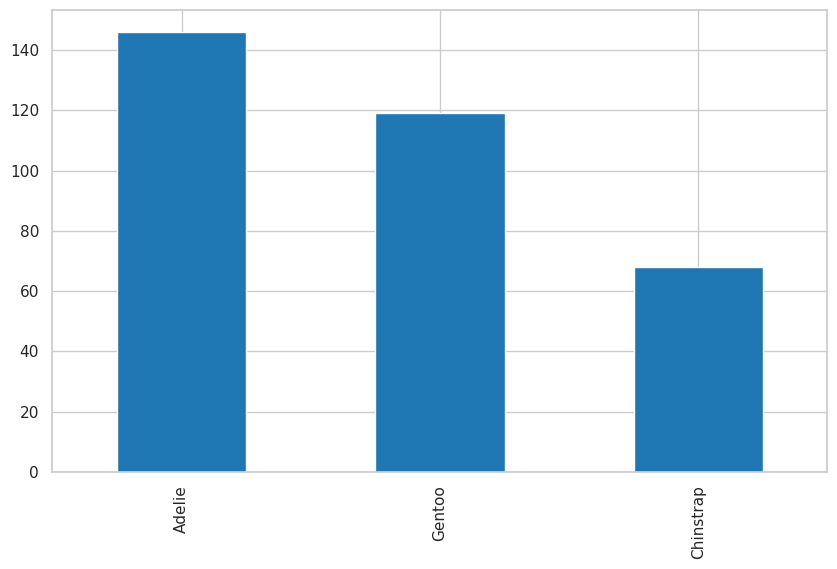

In [18]:
(
    process_penguin_df
    .species
    .value_counts()
    .plot(
    kind= 'bar'
    )
)

**Visualizando los conteos con Seaborn**

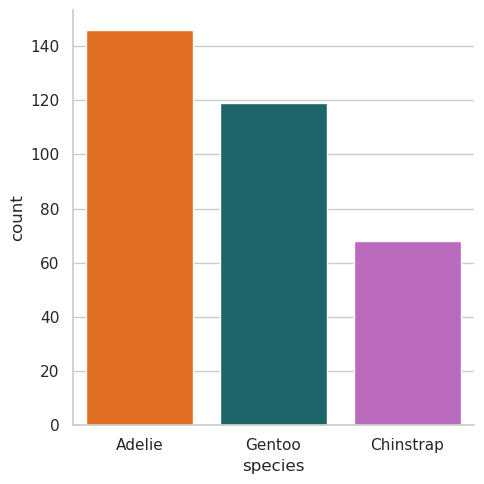

In [19]:
sns.catplot(
    data = process_penguin_df,
    x = 'species',
    kind = 'count',
    palette = penguin_color
)

<AxesSubplot:xlabel='species', ylabel='count'>

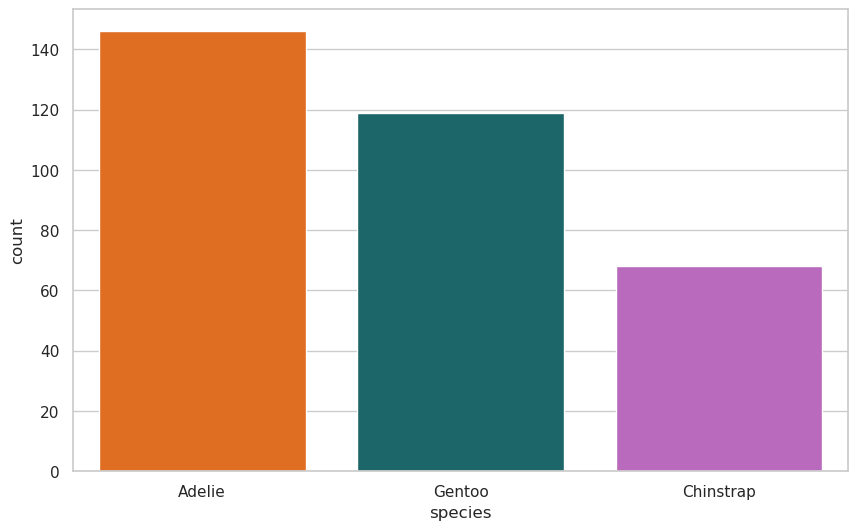

In [20]:
(
    process_penguin_df
    .value_counts('species', sort = True)
    .reset_index(name= 'count')
    .pipe(
        lambda df: (
            sns.barplot(
                data=df,
                x='species',
                y='count',
                palette=penguin_color)
        )
            
        )
)

**¿Cómo visualizamos las proporciones**

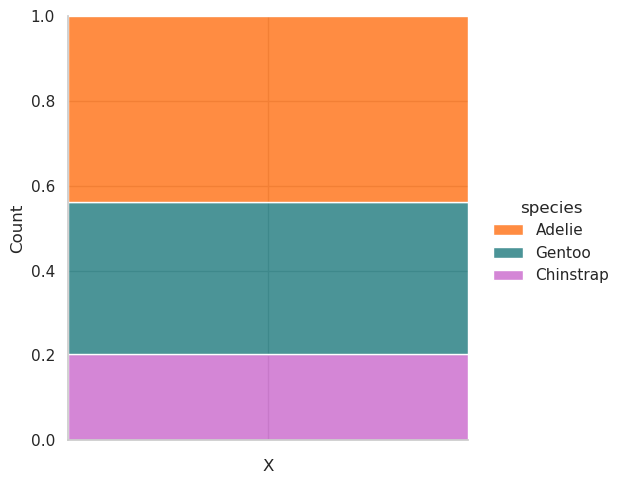

In [21]:
(
    process_penguin_df
    .add_column('X', '')
    .pipe(
        lambda df: (
            sns.displot(
                data = df,
                x = 'X',
                hue = 'species',
                multiple = 'fill',
                palette = penguin_color
            )
        )
    )

)

**Analizando la varioable Island en cuanto a cantidad y proporción**

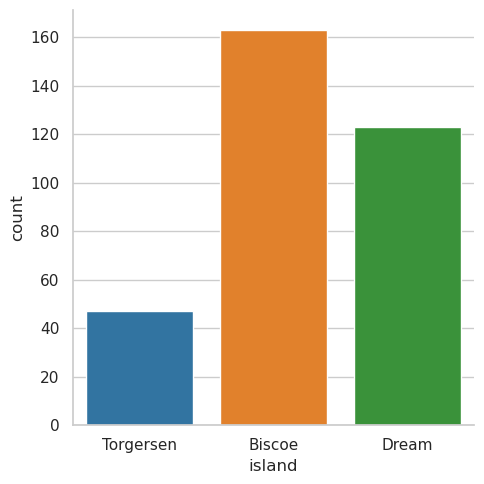

In [22]:
sns.catplot(
    data = process_penguin_df,
    x = 'island',
    kind = 'count',
)

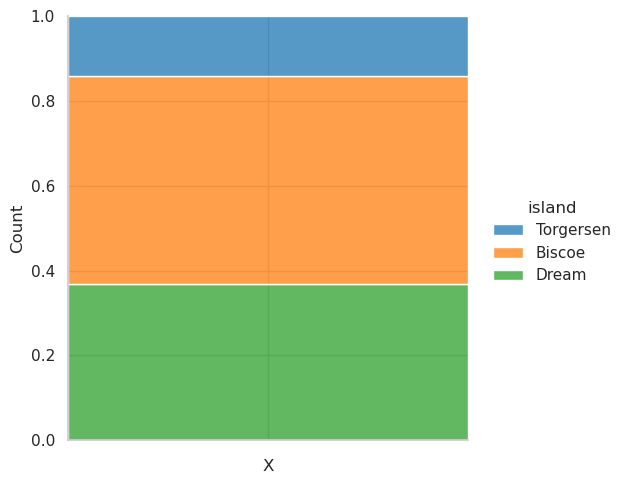

In [23]:
(
    process_penguin_df
    .add_column('X', '')
    .pipe(
        lambda df:
            sns.displot(
                data = df,
                x = 'X',
                hue = 'island',
                multiple = 'fill'
            )
    )
)

**Por último, analizamos la variable Sex y sus proporciones**

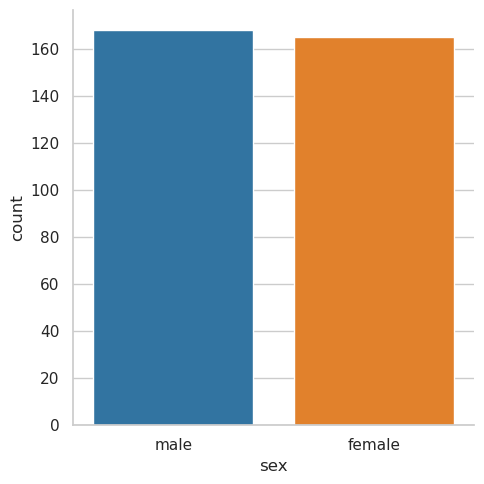

In [24]:
sns.catplot(
    data = process_penguin_df,
    x = 'sex',
    kind = 'count'
    
)

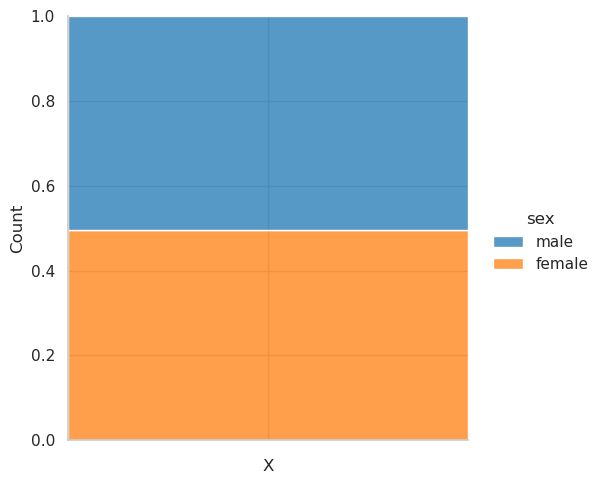

In [25]:
(
    process_penguin_df
    .add_column('X', '')
    .pipe(
        lambda df: 
            sns.displot(
                data = df,
                x = 'X',
                hue = 'sex',
                multiple = 'fill'
            )
    )

)

**Medidas de Tendencia Central**

***Media***

In [26]:
process_penguin_df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [27]:
process_penguin_df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']].mean()

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

***Mediana***

In [28]:
process_penguin_df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']].median()

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64

***Moda***

In [29]:
process_penguin_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


**Medidas de dispersión**

*Valor máximo de las variables*

In [30]:
process_penguin_df.max(numeric_only = True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

In [31]:
process_penguin_df.min(numeric_only = True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

In [32]:
#Rango

process_penguin_df.max(numeric_only = True) - process_penguin_df.min(numeric_only = True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

*Desviación estándar*

In [33]:
process_penguin_df.std(numeric_only = True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

**Rango Intercuartil**

In [34]:
process_penguin_df.quantile(0.75) - process_penguin_df.quantile(0.25)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [35]:
(
    process_penguin_df
    .quantile(q=[0.75, 0.50, 0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr =  lambda df: df[0.75] - df[0.25]
    )
)

,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


**Visualizando la distribución de las variables**

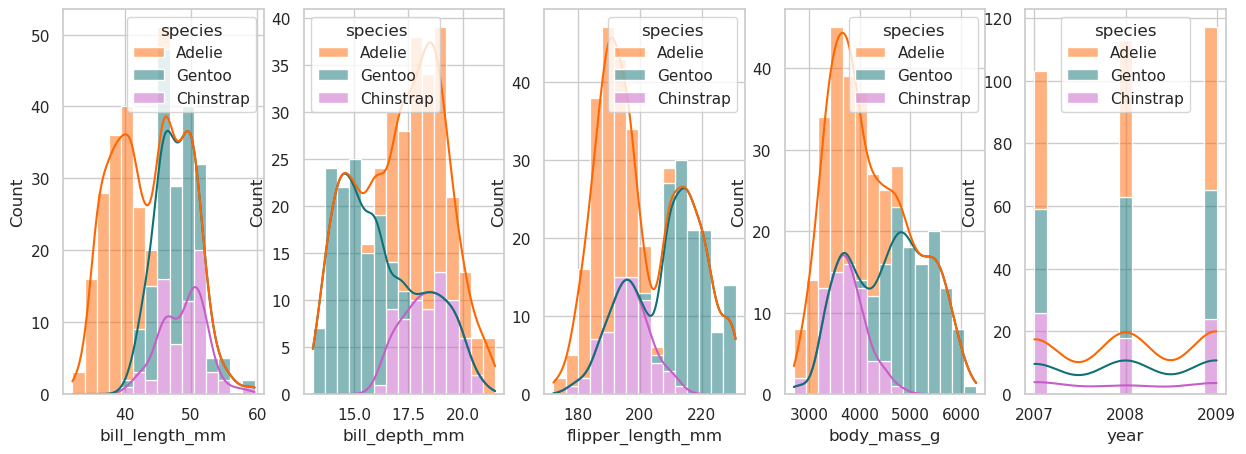

In [36]:
numeric_columns = process_penguin_df.select_dtypes(include=np.number).columns

fig, ax = plt.subplots(1, len(numeric_columns), figsize=(15,5))

for i in range(len(numeric_columns)):
    sns.histplot(
        ax = ax[i],
        data = process_penguin_df,
        x = numeric_columns[i],
        multiple = 'stack',
        hue = 'species',
        bins = 15,
        palette = penguin_color,
        kde = 'true'
    )
 

Text(213.0, 53, 'Q(75%)')

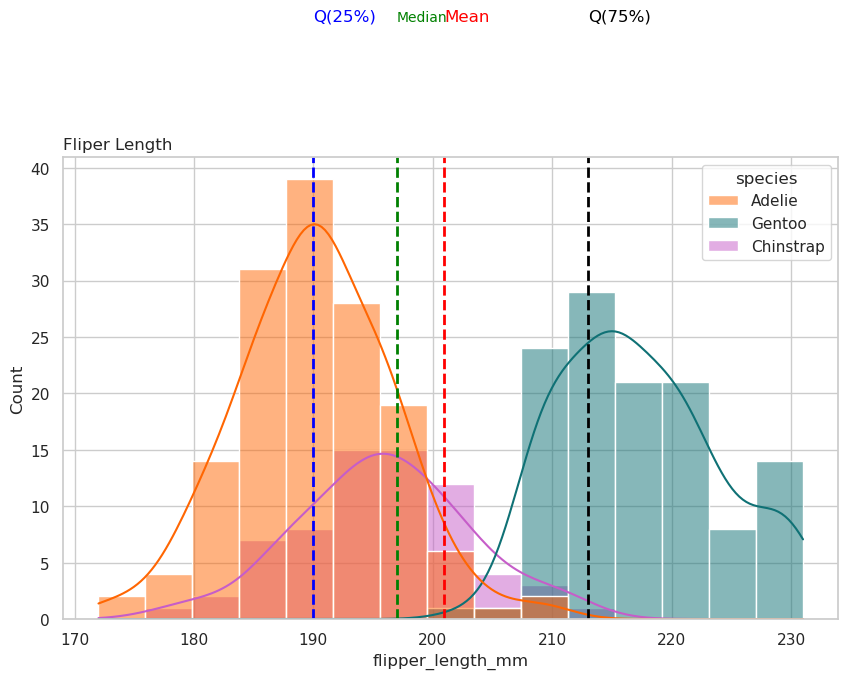

In [37]:
sns.histplot(
    data = process_penguin_df,
    x= 'flipper_length_mm',
    hue = 'species',
    palette = penguin_color,
    kde = True,
    bins = 15
)


plt.axvline(
    x = process_penguin_df.flipper_length_mm.mean(),
    color = 'red',
    linestyle = 'dashed',
    linewidth = 2
)
plt.axvline(
    x = process_penguin_df.flipper_length_mm.median(),
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2
)

plt.axvline(
    x = process_penguin_df.flipper_length_mm.quantile(0.25),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2
)

plt.axvline(
    x = process_penguin_df.flipper_length_mm.quantile(0.75),
    color = 'black',
    linestyle = 'dashed',
    linewidth = 2
)

plt.title('Fliper Length', loc = 'left')
plt.text(process_penguin_df.flipper_length_mm.mean(), 53, 'Mean', fontsize=12, color = 'red')
plt.text(process_penguin_df.flipper_length_mm.median(), 53, 'Median', fontsize=10, color = 'green')
plt.text(process_penguin_df.flipper_length_mm.quantile(0.25), 53, 'Q(25%)', fontsize=12, color = 'blue')
plt.text(process_penguin_df.flipper_length_mm.quantile(0.75), 53, 'Q(75%)', fontsize=12, color = 'black')

Text(48.6, 45, 'Q(75%)')

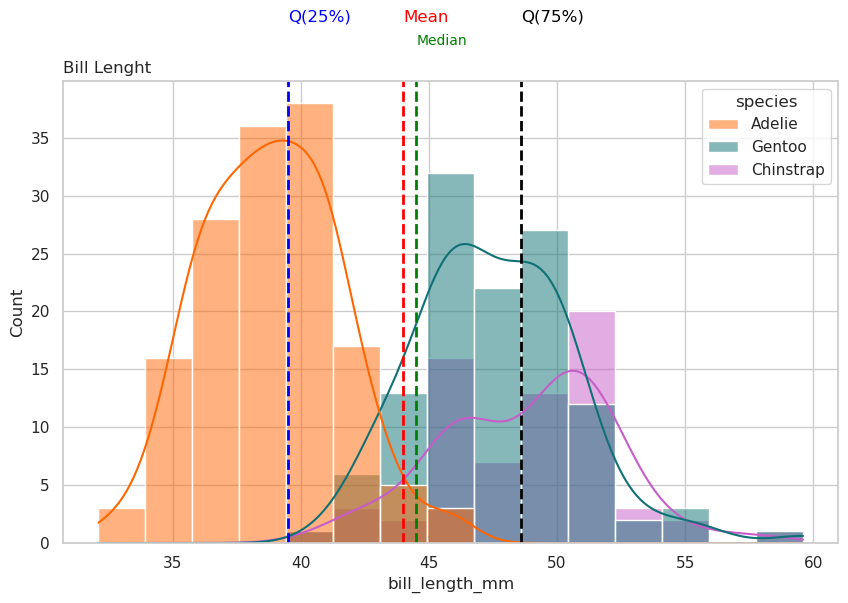

In [38]:
sns.histplot(
    data = process_penguin_df,
    x= 'bill_length_mm',
    hue = 'species',
    palette = penguin_color,
    kde = True,
    bins = 15
)


plt.axvline(
    x = process_penguin_df.bill_length_mm.mean(),
    color = 'red',
    linestyle = 'dashed',
    linewidth = 2
)
plt.axvline(
    x = process_penguin_df.bill_length_mm.median(),
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2
)

plt.axvline(
    x = process_penguin_df.bill_length_mm.quantile(0.25),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2
)

plt.axvline(
    x = process_penguin_df.bill_length_mm.quantile(0.75),
    color = 'black',
    linestyle = 'dashed',
    linewidth = 2
)

plt.title('Bill Lenght', loc = 'left')
plt.text(process_penguin_df.bill_length_mm.mean(), 45, 'Mean', fontsize=12, color = 'red')
plt.text(process_penguin_df.bill_length_mm.median(), 43, 'Median', fontsize=10, color = 'green')
plt.text(process_penguin_df.bill_length_mm.quantile(0.25), 45, 'Q(25%)', fontsize=12, color = 'blue')
plt.text(process_penguin_df.bill_length_mm.quantile(0.75), 45, 'Q(75%)', fontsize=12, color = 'black')


Text(18.7, 41, 'Q(75%)')

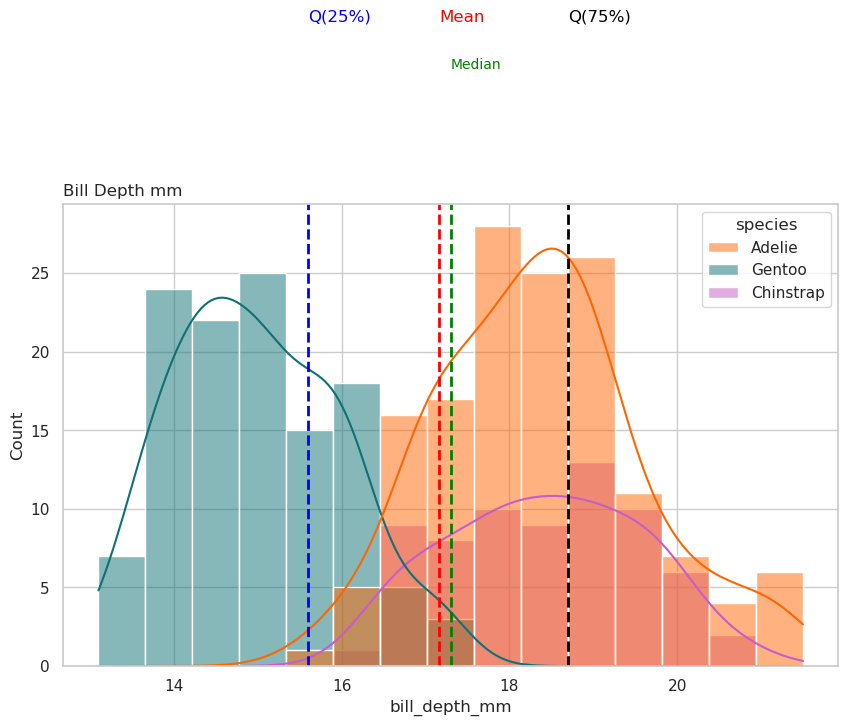

In [39]:
sns.histplot(
    data = process_penguin_df,
    x= 'bill_depth_mm',
    hue = 'species',
    palette = penguin_color,
    kde = True,
    bins = 15
)


plt.axvline(
    x = process_penguin_df.bill_depth_mm.mean(),
    color = 'red',
    linestyle = 'dashed',
    linewidth = 2
)
plt.axvline(
    x = process_penguin_df.bill_depth_mm.median(),
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2
)

plt.axvline(
    x = process_penguin_df.bill_depth_mm.quantile(0.25),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2
)

plt.axvline(
    x = process_penguin_df.bill_depth_mm.quantile(0.75),
    color = 'black',
    linestyle = 'dashed',
    linewidth = 2
)

plt.title('Bill Depth mm', loc = 'left')

plt.text(process_penguin_df.bill_depth_mm.mean(), 41, 'Mean', fontsize=12, color = 'red')
plt.text(process_penguin_df.bill_depth_mm.median(), 38, 'Median', fontsize=10, color = 'green')
plt.text(process_penguin_df.bill_depth_mm.quantile(0.25), 41, 'Q(25%)', fontsize=12, color = 'blue')
plt.text(process_penguin_df.bill_depth_mm.quantile(0.75), 41, 'Q(75%)', fontsize=12, color = 'black')


Text(4775.0, 31, 'Q(75%)')

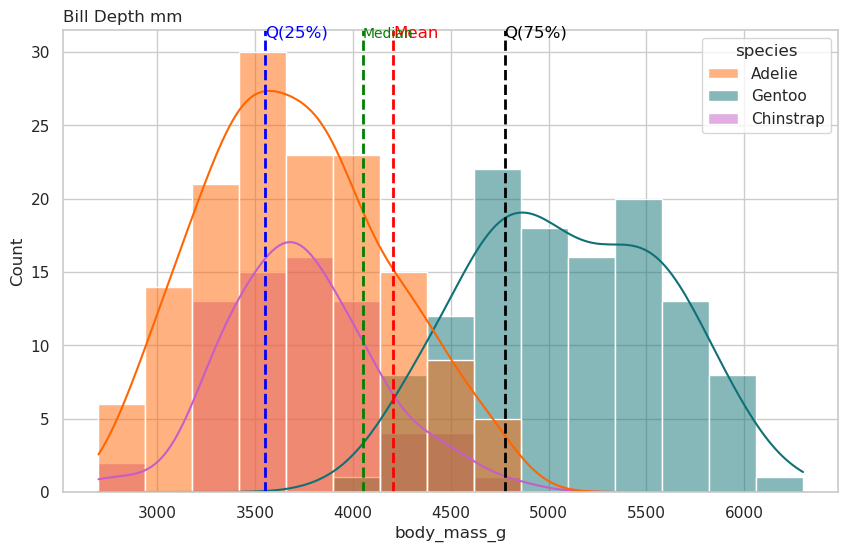

In [40]:
sns.histplot(
    data = process_penguin_df,
    x= 'body_mass_g',
    hue = 'species',
    palette = penguin_color,
    kde = True,
    bins = 15
)


plt.axvline(
    x = process_penguin_df.body_mass_g.mean(),
    color = 'red',
    linestyle = 'dashed',
    linewidth = 2
)
plt.axvline(
    x = process_penguin_df.body_mass_g.median(),
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2
)

plt.axvline(
    x = process_penguin_df.body_mass_g.quantile(0.25),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2
)

plt.axvline(
    x = process_penguin_df.body_mass_g.quantile(0.75),
    color = 'black',
    linestyle = 'dashed',
    linewidth = 2
)

plt.title('Bill Depth mm', loc = 'left')

plt.text(process_penguin_df.body_mass_g.mean(), 31, 'Mean', fontsize=12, color = 'red')
plt.text(process_penguin_df.body_mass_g.median(), 31, 'Median', fontsize=10, color = 'green')
plt.text(process_penguin_df.body_mass_g.quantile(0.25), 31, 'Q(25%)', fontsize=12, color = 'blue')
plt.text(process_penguin_df.body_mass_g.quantile(0.75), 31, 'Q(75%)', fontsize=12, color = 'black')


<AxesSubplot:xlabel='flipper_length_mm'>

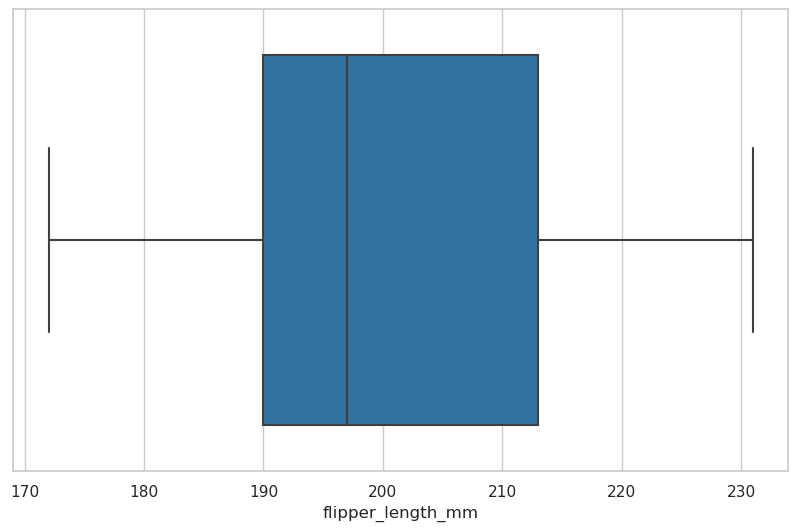

In [41]:
sns.boxplot(
    data = process_penguin_df,
    x = 'flipper_length_mm'
)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='species'>

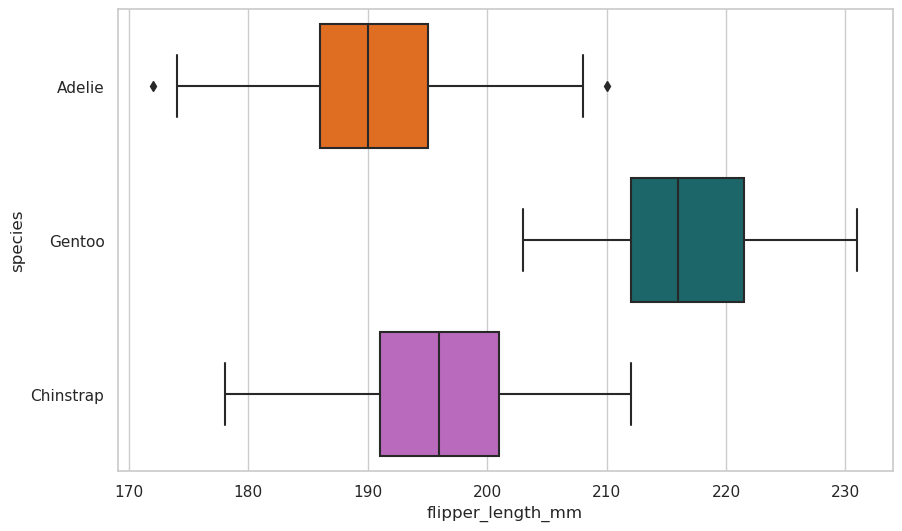

In [42]:
sns.boxplot(
    data = process_penguin_df,
    x = 'flipper_length_mm',
    y = 'species',
    palette = penguin_color
)

**Aplicando funciones de probabilidad**

***Funciones de probabilidad de masas (PMFs)***

*Utilizando Seaborn*

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Probability'>

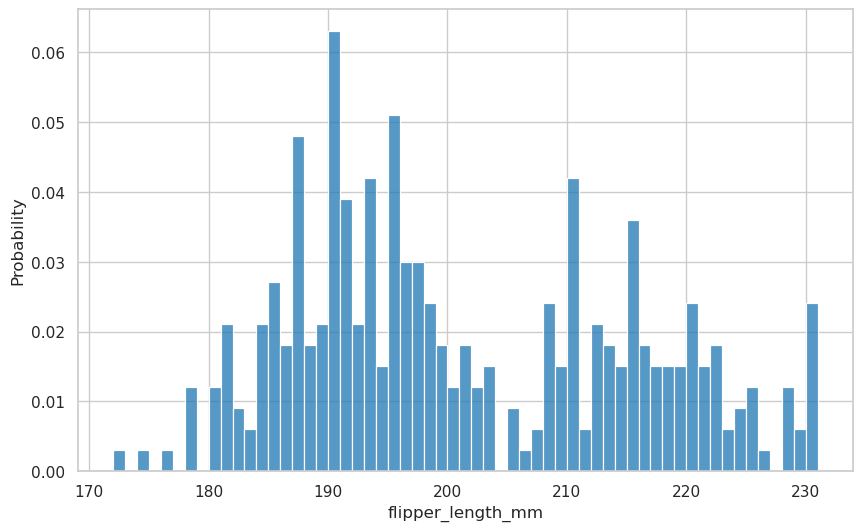

In [43]:
sns.histplot(
    data = process_penguin_df,
    x = 'flipper_length_mm',
    binwidth = 1,
    stat = 'probability'  #Con este parámetro las barras ya no muestran el conteo sino que representan la probabilidad
)

*Utilizando Empiricaldist*

In [44]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    process_penguin_df.flipper_length_mm,
    normalize = True
)

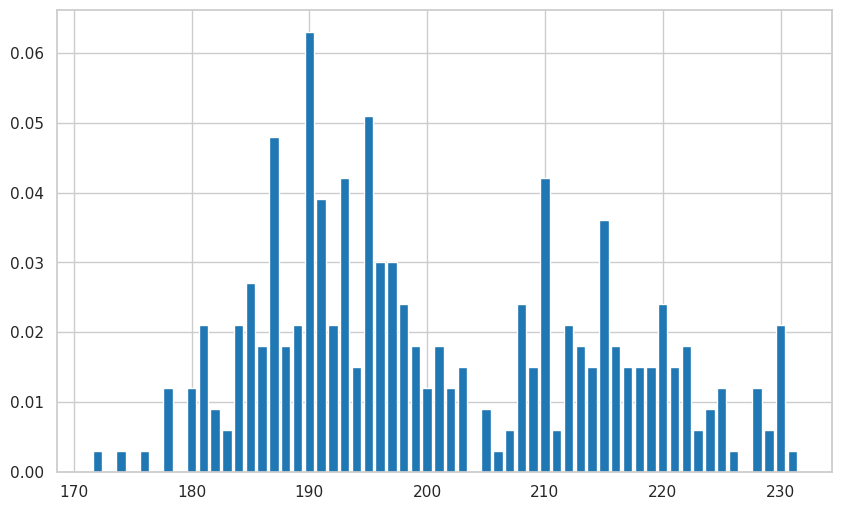

In [45]:
pmf_flipper_length_mm.bar() #Graficando las probabilidades desde el método bar

In [46]:
pmf_flipper_length_mm(190) #Puedo preguntar la probabilidad de encontrar un valor determinado

0.06306306306306306

**Funciones empíricas de probabilidad acumulada (ECDFS)**

*Utilizando Seaborn*

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Proportion'>

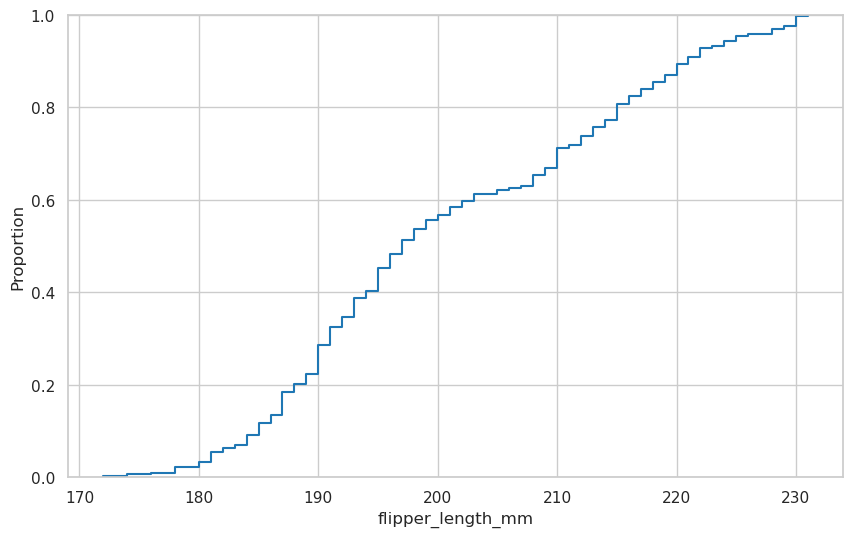

In [47]:
sns.ecdfplot(
    data = process_penguin_df,
    x = 'flipper_length_mm'
)

#Esta gráfica nos muestra la probabilidad acumulada, es decir, qué tan probable es encontrar un valor menor o igual a X medida

*Utilizando EmpiricalDist*

In [48]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    process_penguin_df.flipper_length_mm,
    normalize = True
)

<AxesSubplot:>

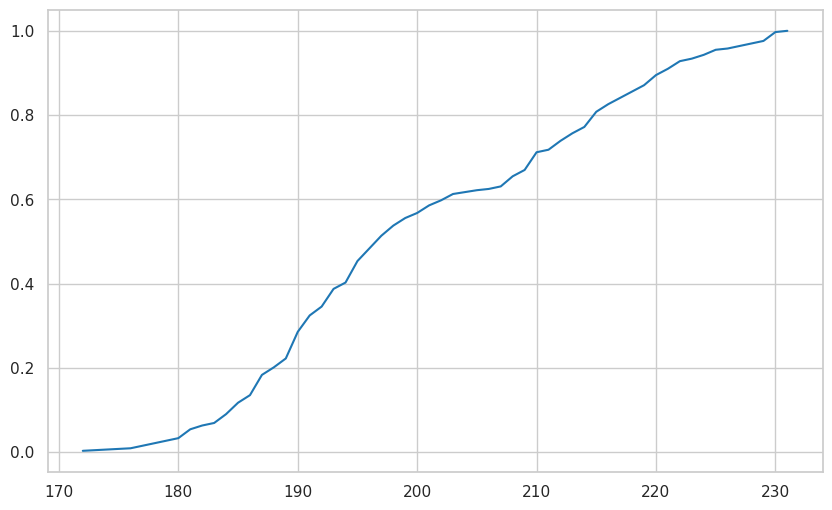

In [49]:
cdf_flipper_length_mm.plot()

In [50]:
def graf_prob_acum(columna, medida):
    
    cdf_variable = empiricaldist.Cdf.from_seq(
    process_penguin_df[columna],
    normalize = True
    )
    
    cdf_variable.plot()

    q = medida
    p = cdf_variable.forward(q)
    
    plt.title(columna, loc = 'left')

    plt.vlines(
        x=q,
        ymin=0,
        ymax=p,
        color='black',
        linestyle='dashed'
    )

    plt.hlines(
        y=p,
        xmin=cdf_variable.qs[0],
        xmax=q,
        color='black',
        linestyle='dashed'
    )

    plt.plot(q,p, 'ro')

None


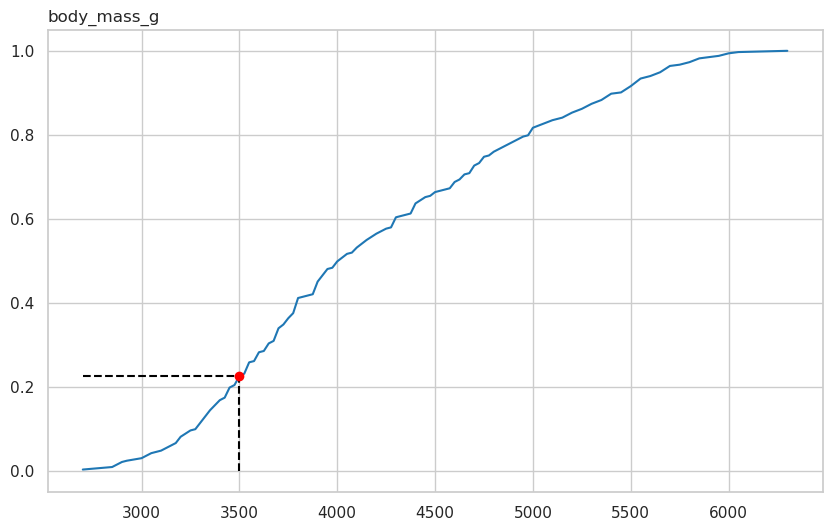

In [51]:
print(graf_prob_acum('body_mass_g', 3500))

**Comparando distribuciones**

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Proportion'>

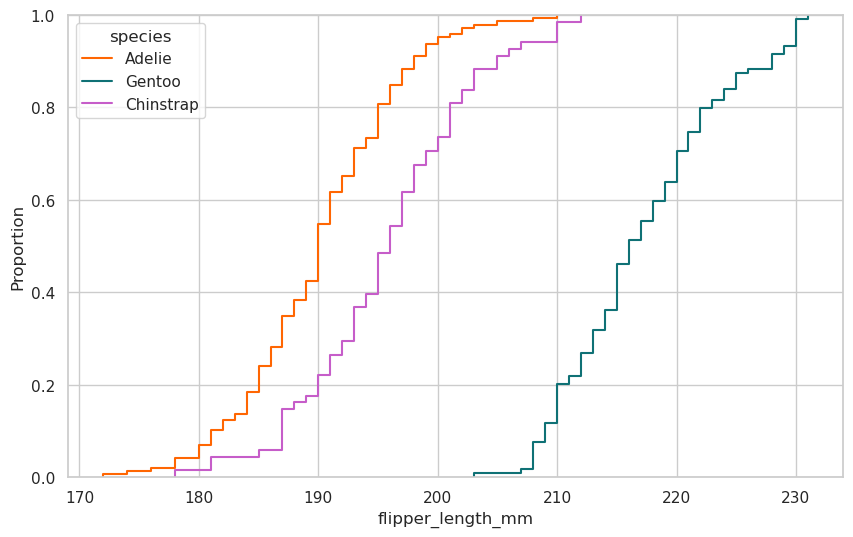

In [69]:
sns.ecdfplot(
    data = process_penguin_df,
    x = 'flipper_length_mm',
    hue = 'species',
    palette = penguin_color
)

#Distribución acumulada de probabilidad de cada una de las especies

**Funciones de densidad de probabilidad**

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

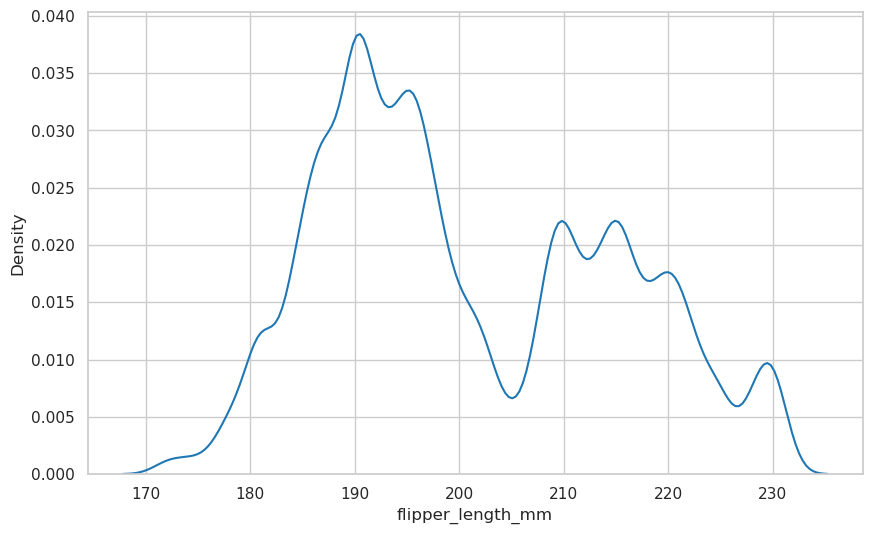

In [70]:
sns.kdeplot(
    data = process_penguin_df,
    x = 'flipper_length_mm',
    #hue = 'species',
    bw_method = 0.1 #Modifica el ancho de la banda
)

In [71]:
stats = process_penguin_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<AxesSubplot:>

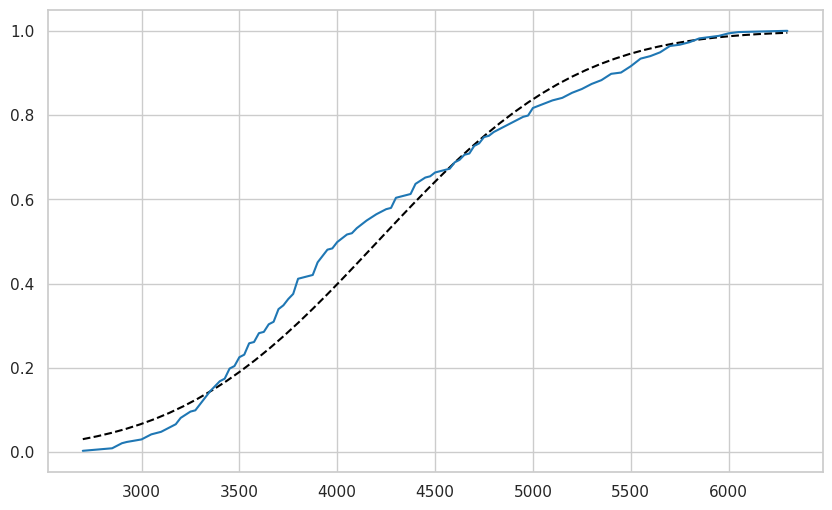

In [72]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)

plt.plot(xs, ys, color = 'black', linestyle = 'dashed')

#La línea punteada muestra el comportamiento de las probabilidades si los datos siguieran una distribución normal
#Graficamos la función de probabilidad acumulada

empiricaldist.Cdf.from_seq(
    process_penguin_df.body_mass_g,
    normalize = True
).plot() #Línea azul


<AxesSubplot:xlabel='body_mass_g', ylabel='Density'>

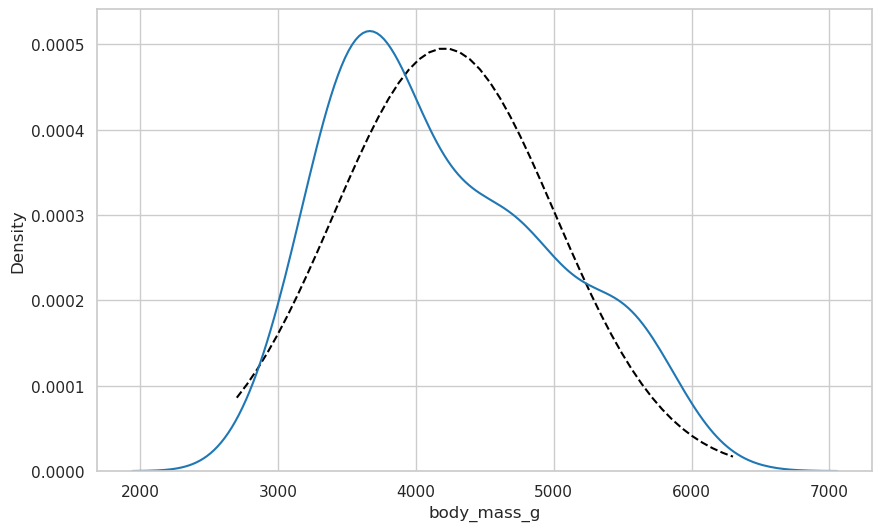

In [76]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

plt.plot(xs, ys, color = 'black', linestyle = 'dashed')

#La línea punteada muestra el comportamiento de las probabilidades si los datos siguieran una distribución normal
#Graficamos la función de probabilidad acumulada

sns.kdeplot(
    data = process_penguin_df,
    x = 'body_mass_g'
)

A partir de estos dos contrastes entre la distribución teórica y la real, 
observamos que nuestros datos sobre el peso no siguen precisamente una distribución normal, 
pues presentan un sesgo a la izquierda.

**Ley de los grandes números**

In [79]:
process_penguin_df.sex.value_counts(normalize = True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

In [81]:
sex_numeric = process_penguin_df.sex.replace(['male', 'female'], [0, 1])

In [89]:
number_samples = 100
sample_size = 35

samples_df = pd.DataFrame()

np.random.seed(42)

for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace = True).to_numpy()
    sample_name = f"sample{i}"
    samples_df[sample_name] = sex_numeric_sample

male_population_mean = samples_df.mean().mean()

print(f"Porcentaje estimado de pinguinos machos en la población es: {male_population_mean * 100:.4f}%")

Porcentaje estimado de pinguinos machos en la población es: 50.0857%


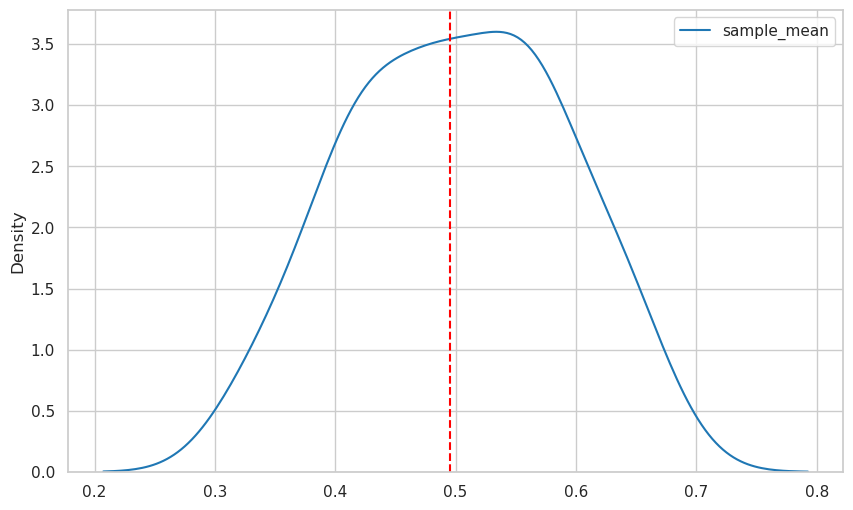

In [114]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns =['sample_mean'])
sns.kdeplot(data = sample_means_binomial)
plt.axvline(x = sex_numeric.mean(), color = 'r', linestyle = '--')

**Análisis bivariado**

**Estableciendo relaciones: Gráficos de puntos**

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

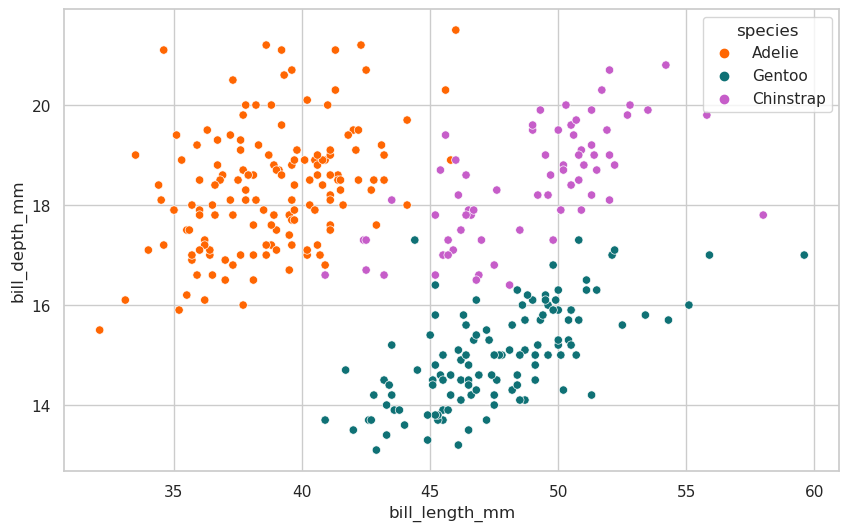

In [132]:
sns.scatterplot(data = process_penguin_df,
            x = 'bill_length_mm',
            y = 'bill_depth_mm',
            hue = 'species',
            palette = penguin_color
            )

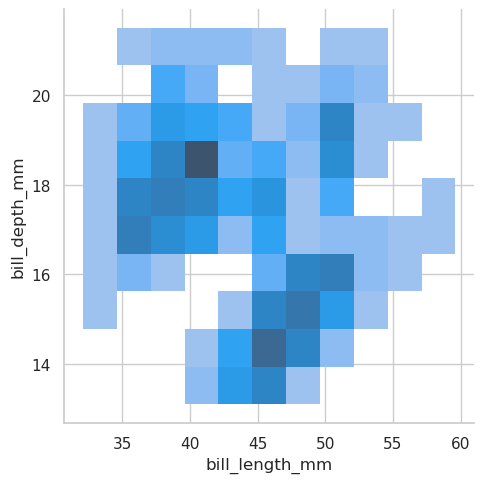

In [133]:
#General

sns.displot(
    data = process_penguin_df,
    x= 'bill_length_mm',
    y= 'bill_depth_mm'b
)

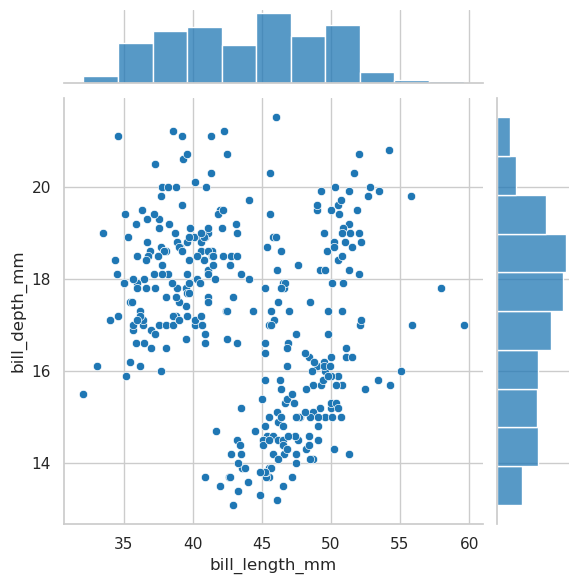

In [146]:
sns.jointplot(
    data =  process_penguin_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm'
)

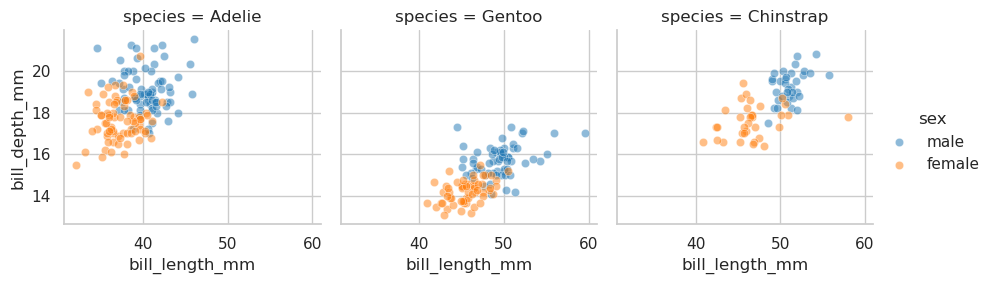

In [164]:
#Analizando relaciones del tamaño de los picos según la especie
(
    sns.FacetGrid(
        process_penguin_df,
        col = 'species',
        hue = 'sex'
    )
    .map(
        sns.scatterplot,
        'bill_length_mm',
        'bill_depth_mm',
        alpha = 0.5
    )
    .add_legend()

)

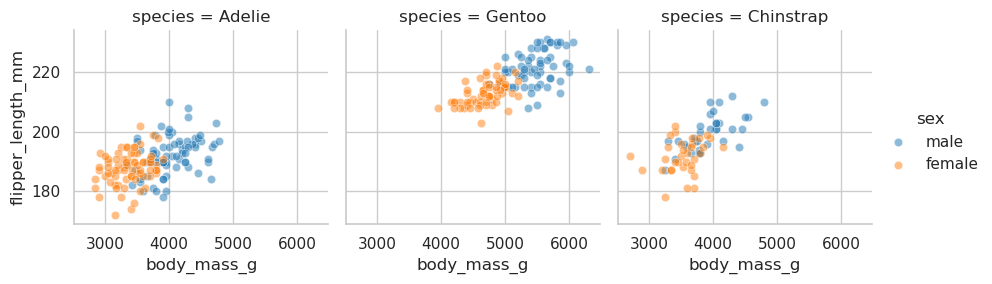

In [163]:
#Analizando relaciones entre el peso y el tamaño de las alas según la especie y diferenciado por sexo
(
    sns.FacetGrid(
        process_penguin_df,
        col = 'species',
        hue = 'sex'
    )
    .map(
        sns.scatterplot,
        'body_mass_g',
        'flipper_length_mm',
        alpha = 0.5
    )
    .add_legend()

)

**Esableciendo relaciones: Gráficos de Violín y Boxplots**

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

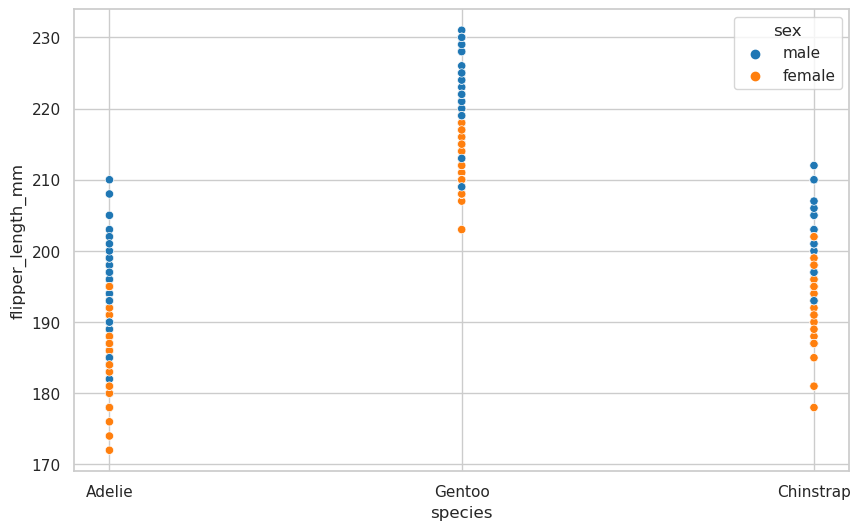

In [169]:
sns.scatterplot(
    data = process_penguin_df,
    x = 'species',
    y = 'flipper_length_mm',
    hue = 'sex',
    color = penguin_color
)

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

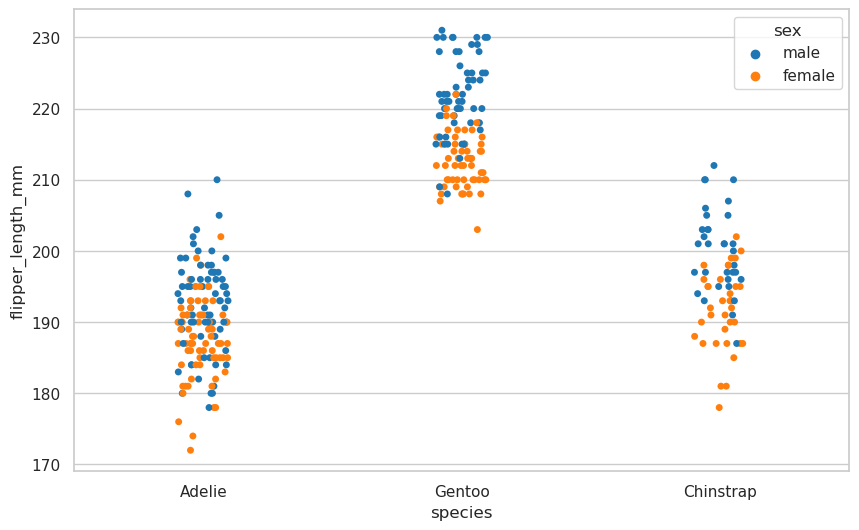

In [174]:
#Añadiendo ruido para visualizar mejor los puntos:

sns.stripplot(
    data = process_penguin_df,
    x = 'species',
    y = 'flipper_length_mm',
    hue = 'sex'
)

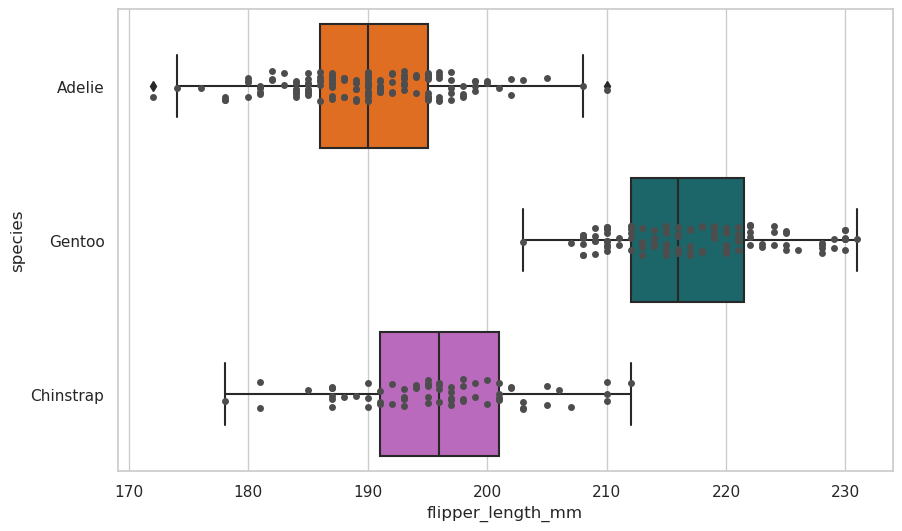

In [187]:
ax= sns.boxplot(
    data = process_penguin_df,
    x = 'flipper_length_mm',
    y = 'species',
    #hue = 'species',
    palette = penguin_color
)

#Añadiendo puntos para visualizar mejor la distribución

ax = sns.stripplot(
    data = process_penguin_df,
    x = 'flipper_length_mm',
    y = 'species',
    color = '.3'
)

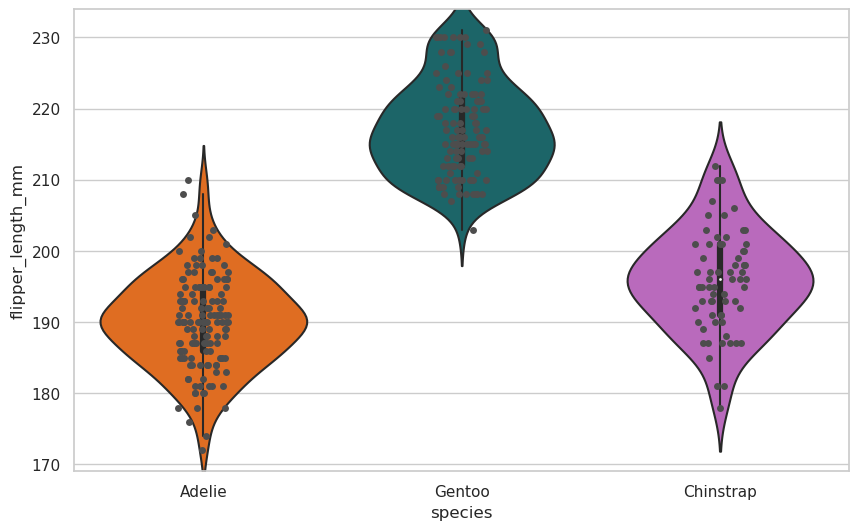

In [186]:
ax = sns.violinplot(
    data = process_penguin_df,
    x = 'species',
    y = 'flipper_length_mm',
    #hue = 'species',
    palette = penguin_color
)


ax = sns.stripplot(
    data = process_penguin_df,
    x = 'species',
    y = 'flipper_length_mm',
    color = '.3'
)

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

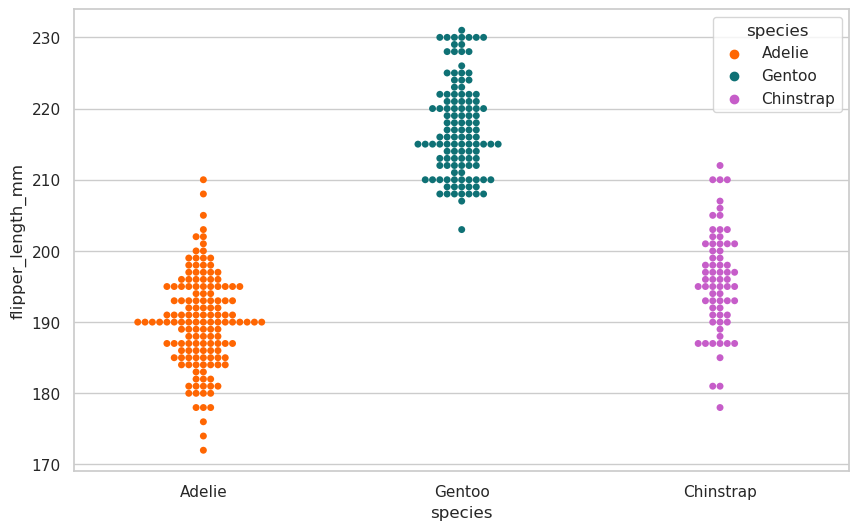

In [188]:
sns.swarmplot(
    data = process_penguin_df,
    x = 'species',
    y = 'flipper_length_mm',
    hue = 'species',
    palette = penguin_color
)

**Estableciendo relaciones: Matrices de correlación**

In [191]:
process_penguin_df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


<AxesSubplot:>

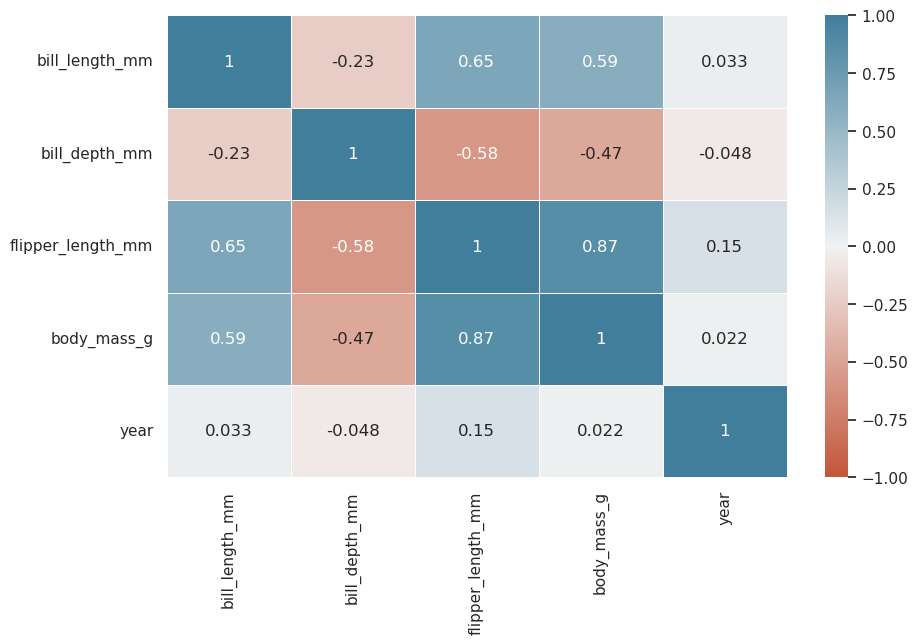

In [197]:
sns.heatmap(
    process_penguin_df.corr(),
    cmap = sns.diverging_palette(20, 230, as_cmap = True),
    center = 0,
    vmin =-1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
)

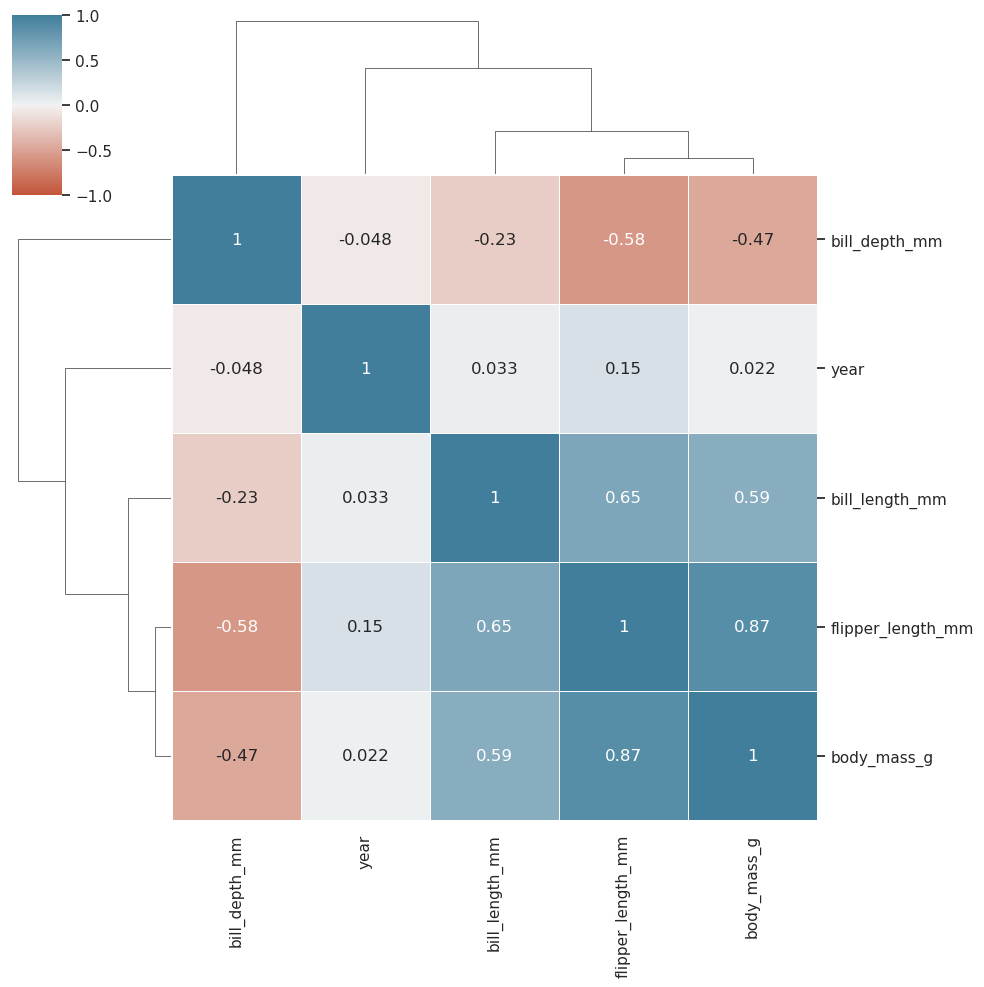

In [198]:
#Ordena las variables de modo tal que las mayores correlaciones se agrupen

sns.clustermap(
    process_penguin_df.corr(),
    cmap = sns.diverging_palette(20, 230, as_cmap = True),
    center = 0,
    vmin =-1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
)

**¿Hay alguna correlación con el sexo de los pingüinos?** Para averiguarlo debemos agregar una columna de sexo representado de forma numérica:

In [200]:
process_penguin_df = (
    process_penguin_df.assign(
        numeric_sex = lambda df: df.sex.replace(['female', 'male'], [0, 1])
                             )
)

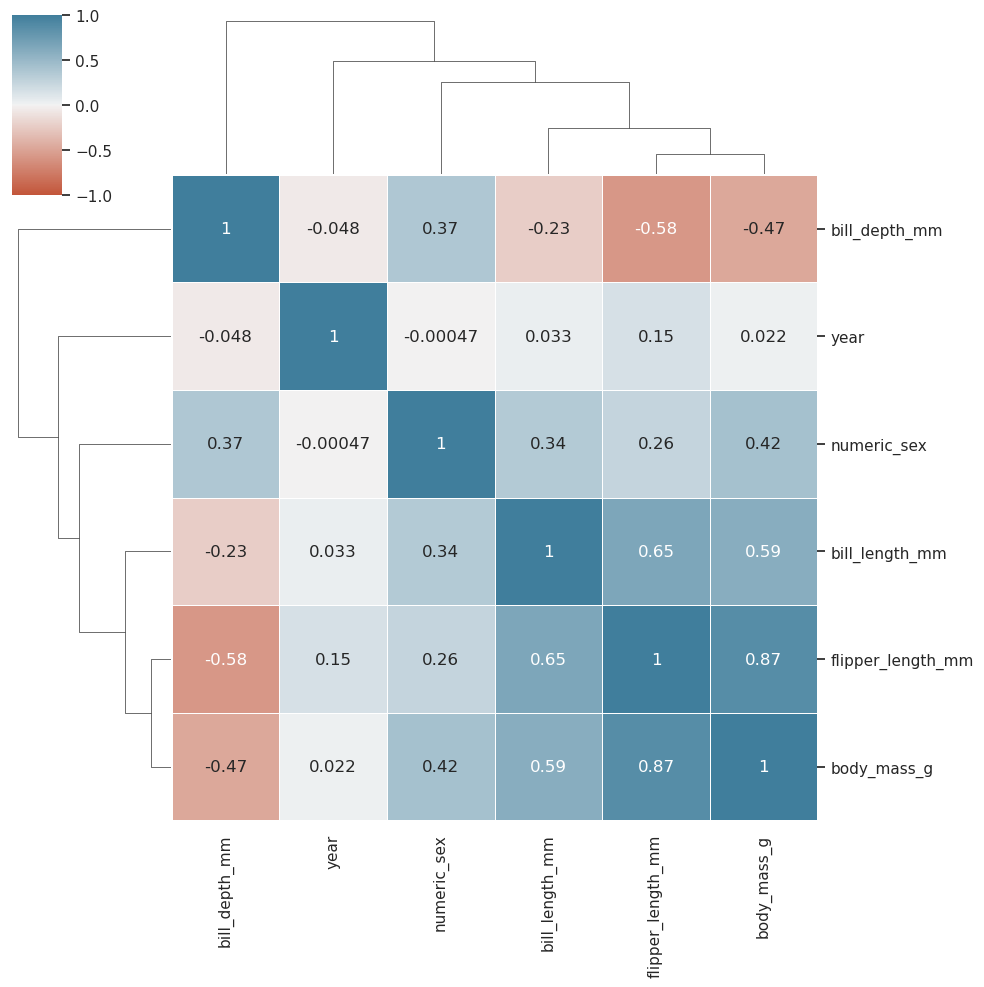

In [202]:
#Graficamos nuevamente el Clustermap para analizar la correlación de las variables con el sexo

sns.clustermap(
    process_penguin_df.corr(),
    cmap = sns.diverging_palette(20, 230, as_cmap = True),
    center = 0,
    vmin =-1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
)

**Estableciendo relaciones: Análisis de Regresión Simple**

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


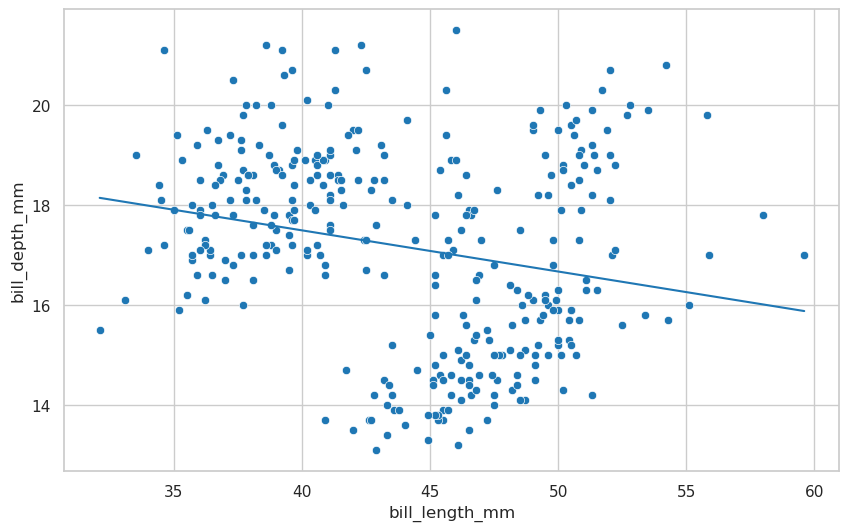

In [210]:
sns.scatterplot(
    data = process_penguin_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm'
)

res_bill_penguins = scipy.stats.linregress(
    x = process_penguin_df.bill_length_mm,
    y = process_penguin_df.bill_depth_mm
)

print(res_bill_penguins)

fx_1 = np.array([process_penguin_df.bill_length_mm.min(), process_penguin_df.bill_length_mm.max()])
fy_1 = res_bill_penguins.intercept + res_bill_penguins.slope * fx_1

plt.plot(fx_1, fy_1)

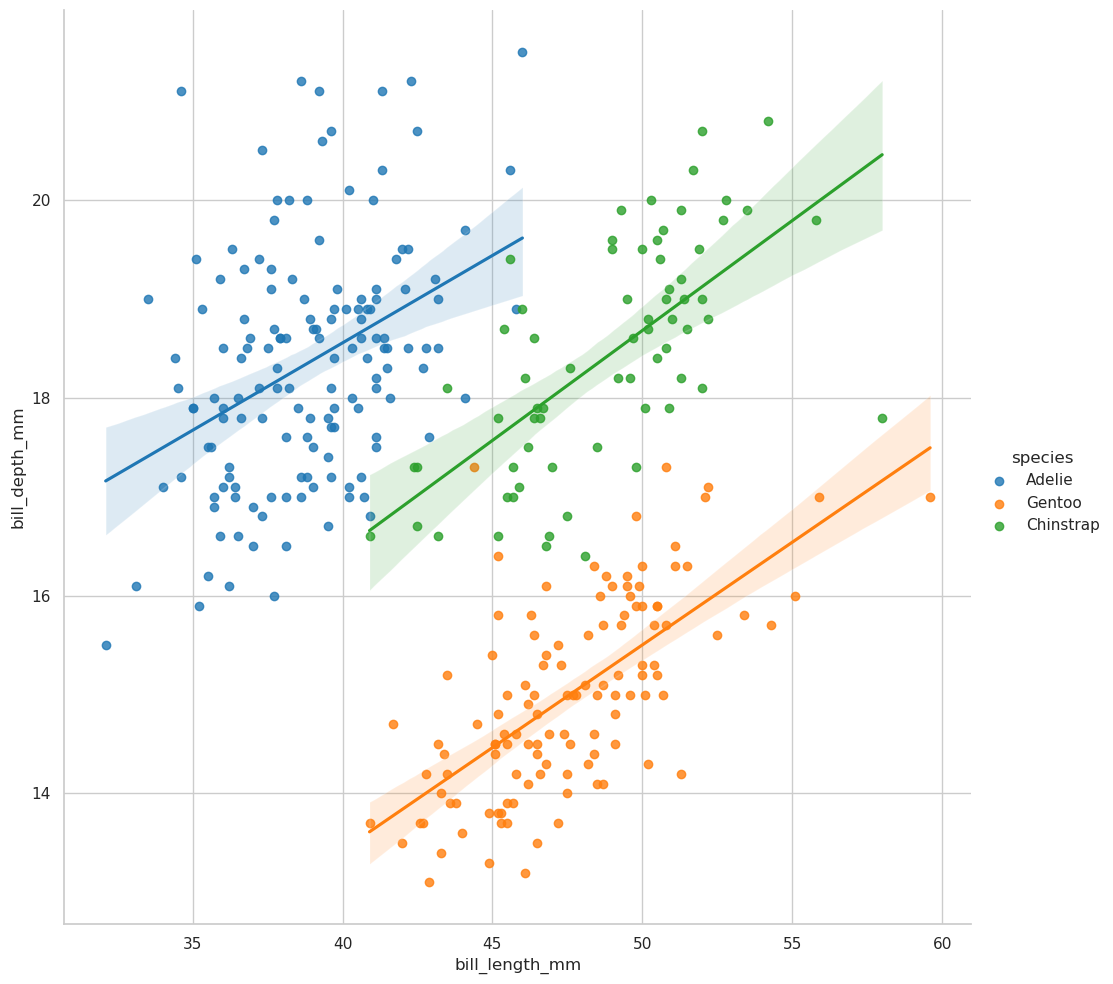

In [214]:
#Graficando la regresión directamente con Seaborn

sns.lmplot(
    data = process_penguin_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    height = 10,
    hue = 'species'
)

Nota: Revisar otros cruces de variables y analizar otros modelos de regresión